# Tarea 1: Entrenar una red Neuronal
Nombre: Vicente Illanes

# Parte 1: Neuronas

In [1]:
import random
import numpy as np

#Clase Perceptron
class Neuron:
    #Contructor de la clase
    #num_w: numero de pesos (uno por cada input)
    #fun: función de activación
    def __init__(self, num_w, fun):
        ws = []
        for i in range(num_w):
            v = -1 + 2*random.random()
            ws.append(v) #valores entre -1 y 1
        self.w= ws
        b =-1 + 2*random.random()
        self.b = b
        self.f = fun
        self.delta = 0.0
        
    
    
    def feed(self, x):
        #prediccion de la neurona: f(wx + b) = pred
        #se revisa que entrada sea una lista numerica y coincida con el largo de la lista de pesos
        if(len(self.w)==len(x)):
            try: 
                sum = 0
                for i in range(len(self.w)):
                    sum = sum + self.w[i]*x[i]
                sum = sum + self.b
                self.output= self.f.apply(sum)
                return self.output
            except:
                print("Valores del input deben ser numericos")
        else:
            print("No coinciden largos del input y la cantidad de pesos de la neurona")
    
    def train(self, x, real):
        #training de la neurona
        pred = self.feed(x)
        diff = pred - real
        lr = 0.1
        if(diff!=0):        
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + (lr * x[i] * diff)
            self.b = self.b + (lr * diff)
            
    def getW(self):
        return self.w
    
    def get_w(self, j):
        return self.w[j]
    
    def set_w(self, j, value):
        self.w[j] = self.w[j] + value
    
    def getBias(self):
        return self.b
    
    def setBias(self, value):
        self.b = self.b + value
    
    def transferDerivate(self, output):
        return self.f.derivate(output)
    
    def setDelta(self, value):
        self.delta = value
        
    def getDelta(self):
        return self.delta 
        
    def getOutput(self):
        return self.output

            


# Parte 2: Capas de Neuronas

In [2]:

#Clase para una capa de la red neuronal
#se crea a partir de un numero de imputs, neuronas y una funcion de activacion 
#(que es la misma para todas las neuronas de la capa)
class NeuronLayer:
    #Constructor
    #x_size: tamaño del input
    #numero de neuronas en la capa
    #fun_act: función de activación
    def __init__(self, x_size, num_neuron, fun_act):
        self.input = x_size
        self.list_neurons = []
        for i in range(num_neuron):
            self.list_neurons.append(Neuron(x_size, fun_act))
        
        self.isOutputLayer = 0 #variable importante para Backpropagation
            
    def feed(self, x):
        if(len(x)== self.input):
            y = []
            for i in range(len(self.list_neurons)):
                y.append(self.list_neurons[i].feed(x))
            return y
        else:
            print("No coinciden largos del input y la cantidad de pesos de la neurona")
            
    def getNeurons(self):
        return self.list_neurons
    
           
           
    
    
    
        

        
            

In [3]:
def MSE(y_pred, y, N, safe=True):
    sum = 0.0
    if safe:
        for i in range(len(y_pred)):
            sum += (y_pred[i]-y[i])**2
    return sum/N 

In [82]:
         
class NeuronNetwork:
    def __init__(self, num_layers, list_neuron, x_size, y_size, list_functions):
        
        layers = [x_size] + list_neuron 
        
        self.layers =[]
        for i in range(0, num_layers):
            if(i == num_layers-1):
                self.layers.append(NeuronLayer(list_neuron[-1], y_size, list_functions[-1]))
            else:
                self.layers.append(NeuronLayer(layers[i], layers[i+1], list_functions[i]))
                  
    
    def feed(self, x):
        h = x
        for i in range(len(self.layers)):
            h = self.layers[i].feed(h)
        return h
    
    def backpropagation(self, y):
        network = self.layers
        for i in reversed(range(len(network))):
            layer = network[i]
            neurons = layer.getNeurons()
            if i != len(network)-1: 
                #Caso Hidden Layer
                for j in range(len(neurons)):
                    error = 0.0
                    for neuron in network[i+1].getNeurons():
                        error += (neuron.get_w(j) * neuron.getDelta())
                    neuron = neurons[j]
                    output = neuron.getOutput()
                    neuron.setDelta(error * neuron.transferDerivate(output))
            else: 
                #Caso OutputLayer
                for j in range(len(neurons)):
                    neuron = neurons[j]
                    output = neuron.getOutput()
                    error =(y[j] - output)
                    neuron.setDelta(error * neuron.transferDerivate(output))        
            
    def update_parameters(self, x, lr):
        network= self.layers
        inputs = x
        for i in range(len(network)):
            neurons = network[i].getNeurons()
            outputs = []
            for neuron in neurons:
                weights = neuron.getW()
                for j in range(len(weights)):
                    neuron.set_w(j, lr * neuron.getDelta() * inputs[j])
                    neuron.setBias(lr * neuron.getDelta())
                output = neuron.getOutput()
                outputs.append(output)
            inputs = outputs
    
    def max(self, output):
        max =-1
        j= -1
        for i in range(len(output)):
            if output[i] > max:
                max = output[i]
                j = i
        y_pred = [0, 0, 0]
        y_pred[j]=1
        return y_pred
    
    def equal(self, y_pred, y):
        for i in range(len(y_pred)):
            if y_pred[i]!=y[i]:
                return False
        return True
    
    def train_network(self, inputs, expected, lr, n_epoch, safe=True):
        self.errors = []
        self.acc = []
        self.epochs = n_epoch
        for epoch in range(n_epoch):
            sum_error = 0.0
            acc = 0
            for i in range(len(inputs)):
                output = self.feed(inputs[i])
                y_pred = self.max(output)
                y_real =[0, 0, 0]
                y_real[expected[i][0]]=1                
                sum_error += MSE(output, y_real, len(inputs))
                self.backpropagation(y_real)
                self.update_parameters(inputs[i], lr)
                if self.equal(y_pred, y_real): acc +=1
            acc = (acc/len(inputs))*100
            self.errors.append(sum_error)
            self.acc.append(acc)
            print('>epoch=%d, lrate=%.3f, error=%.3f, acc=%.3f' % (epoch, lr, sum_error, acc))
            
            
    def predecir(self, X_test, y_test):
        sum_error = 0.0
        acc = 0.0
        for i in range(len(X_test)):
                    y_pred = self.feed(X_test[i])
                    y_pred = self.max(y_pred)
                    y_real =[0, 0, 0]
                    y_real[y_test[i][0]]=1                
                    sum_error += MSE(y_pred, y_real, len(X_test))
                    if self.equal(y_pred, y_real): acc +=1
        acc = (acc/len(X_test))*100
        print('error=%.3f, acc=%.3f' % (sum_error, acc))
        
    def plot_error(self):       
        plt.plot(self.errors)
        plt.axis([0, self.epochs, 0, 1])
        plt.suptitle('Porcentaje de error por época')
        plt.xlabel("época")
        plt.ylabel('error %')
        plt.show()
  
    def plot_acc(self):
        plt.plot(self.acc)
        plt.axis([0, self.epochs, 0, 100])
        plt.suptitle('Porcentaje de accuracy por época')
        plt.xlabel("época")
        plt.ylabel('accuracy %')
        plt.show()
        
            




# Funciones de Activación

In [83]:
import math
#función escalon
class Step:
    def apply(self, x):
        if (x>=0):
            return 1
        else:
            return 0

#funcion sigmoid
class Sigmoid :
    def apply(self, x):
        return 1 / (1 + math.exp(-x))

    def derivate(self, x):
        return self.apply(x) * (1 - self.apply(x))
    
class Tanh:
    def apply(self, x):
        return (math.exp(x) - math.exp(-x))/(math.exp(x) + math.exp(-x))
    
    def derivate(self,x):
        return 1 - (self.apply(x)*self.apply(x))


# Dataset

### Carga de datos, normalización y one hot encoding

In [84]:
import pandas as pd
data = pd.read_csv('iris.data', sep=",")
data.columns = ["sepal length","sepal width", "petal length", "petal width", "class"]
data["class"] = data["class"].map(lambda x: 0 if x =="Iris-setosa" else 1 if x == "Iris-versicolour" else 2 if x == "Iris-virginica" else -1)

data_normalized = data
max = data.max()
min = data.min()
for column in data.columns:
    if(column != "class"):
        data_normalized[column] = data[column].map(lambda x: round((x - min[column])/(max[column]-min[column]),4))
        
X = data_normalized[["sepal length","sepal width", "petal length", "petal width"]]
Y = data_normalized[["class"]]
        

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=13, stratify=Y)

In [86]:
from random import seed
step = Step()
sigmoid = Sigmoid()
tanh = Tanh()
seed(1)
red =NeuronNetwork(4,[10, 5, 5],4,3, [tanh , tanh ,sigmoid , sigmoid])    

In [87]:
batch = X_train.values.tolist()
expected = y_train.values.tolist()
red.train_network(batch, expected, 0.1, 20)


>epoch=0, lrate=0.100, error=0.487, acc=63.964
>epoch=1, lrate=0.100, error=0.430, acc=66.667
>epoch=2, lrate=0.100, error=0.385, acc=67.568
>epoch=3, lrate=0.100, error=0.225, acc=92.793
>epoch=4, lrate=0.100, error=0.099, acc=100.000
>epoch=5, lrate=0.100, error=0.044, acc=100.000
>epoch=6, lrate=0.100, error=0.024, acc=100.000
>epoch=7, lrate=0.100, error=0.015, acc=100.000
>epoch=8, lrate=0.100, error=0.010, acc=100.000
>epoch=9, lrate=0.100, error=0.008, acc=100.000
>epoch=10, lrate=0.100, error=0.006, acc=100.000
>epoch=11, lrate=0.100, error=0.005, acc=100.000
>epoch=12, lrate=0.100, error=0.004, acc=100.000
>epoch=13, lrate=0.100, error=0.003, acc=100.000
>epoch=14, lrate=0.100, error=0.003, acc=100.000
>epoch=15, lrate=0.100, error=0.002, acc=100.000
>epoch=16, lrate=0.100, error=0.002, acc=100.000
>epoch=17, lrate=0.100, error=0.002, acc=100.000
>epoch=18, lrate=0.100, error=0.001, acc=100.000
>epoch=19, lrate=0.100, error=0.001, acc=100.000


In [88]:
X_test = X_test.values.tolist()
y_test = y_test.values.tolist()

red.predecir(X_test, y_test)
    

error=0.000, acc=100.000


In [89]:
import matplotlib.pyplot as plt

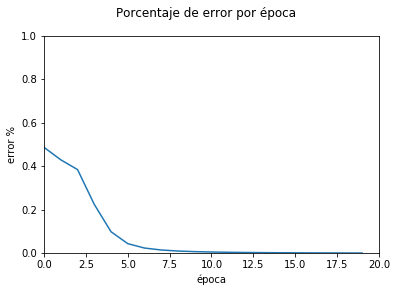

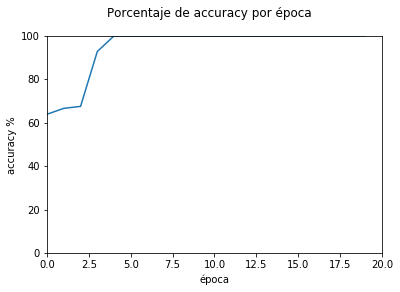

In [90]:
red.plot_error()
red.plot_acc()